# Todos los jugadores que “retaron” a más de H oponentes distintos (H es un parámetro de la consulta).
1. El primer Job funciona solo para hacer la parte de distintos. El mapper escribe como clave el retador y el retado con un valor cualquiera (1 como arbitrario en este caso). El reducer escribe **UNA VEZ** el retador y el retado.
2. Segundo Job calcula la cantidad y escribe si cumple con el parametro H. Map no hace nada, todo el trabajo recae en el reducer.

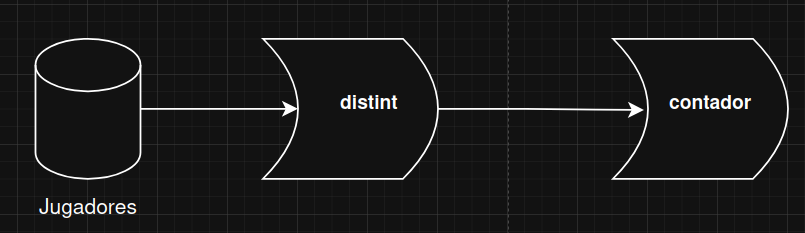

Primer Job Distinct

In [13]:
from MRE import Job
inputDir = "./jugadores/"
outputDir = "./distinct/"

In [ ]:
def fmap(key, value, context):
    lista = value.split()
    context.write((key,lista[0]),1)

def fred(key, values, context):
    context.write(key[0], key[1])

jobDistinct = Job(inputDir, outputDir, fmap, fred)
success = jobDistinct.waitForCompletion()

print(success)

True


Segundo job que calcula el cantidad y escribe de ser necesario

In [15]:
inputDir = "./distinct/"
outputDir = "./out/"

In [ ]:
def fmap(key, value, context):
    context.write(key, value)

def fred(key, values, context):
    c = 0
    for v in values:
        c += 1
    if c >= H:
        context.write(key, c)

H = 12

jobCount = Job(inputDir, outputDir, fmap, fred)
jobCount.setParams(H)
success = jobCount.waitForCompletion()

print(success)

True
